Para os exercícios abaixo utilize a base Wine disponível no módulo datasets do sklearn:

1. Carregue a base de dados.
2. Selecione as três características mais relevantes de acordo com o método Select K Best.
3. Encontre as duas primeiras componentes principais e plot os dados considerando-as. Mostre a variabilidade que cada componente está expressando.
4. Plot a matriz de correlação das características utilizando o seaborn.

# 1

In [ ]:
import pandas as pd

from sklearn.datasets import load_wine

data = load_wine()

X = pd.DataFrame(data.data, columns=data.feature_names)
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


# 2

In [23]:
from sklearn.feature_selection import SelectKBest, f_classif

y = pd.Series(data.target)

selector = SelectKBest(score_func=f_classif, k=3)

X_new = selector.fit(X, y)

X.columns[X_new.get_support(indices=True)], selector.scores_[selector.get_support(indices=True)]

(Index(['flavanoids', 'od280/od315_of_diluted_wines', 'proline'], dtype='object'),
 array([233.92587268, 189.97232058, 207.9203739 ]))

# 3

In [33]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_
X_pca[:5], explained_variance, sum(explained_variance)

(array([[ 3.18562979e+02,  2.14921307e+01],
        [ 3.03097420e+02, -5.36471768e+00],
        [ 4.38061133e+02, -6.53730945e+00],
        [ 7.33240139e+02,  1.92729032e-01],
        [-1.15714285e+01,  1.84899946e+01]]),
 array([0.99809123, 0.00173592]),
 np.float64(0.9998271461166032))

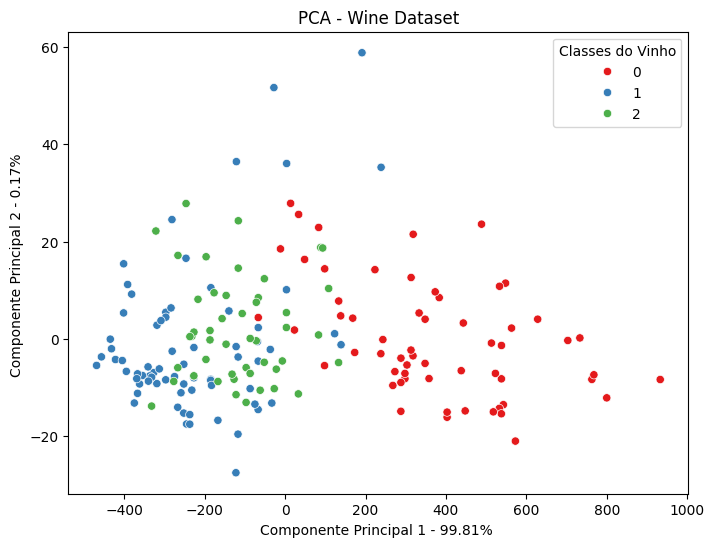

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set1')
plt.title('PCA - Wine Dataset')
plt.xlabel(f'Componente Principal 1 - {explained_variance[0]:.2%} ')
plt.ylabel(f'Componente Principal 2 - {explained_variance[1]:.2%} ')
plt.legend(title='Classes do Vinho')
plt.show()

# 4

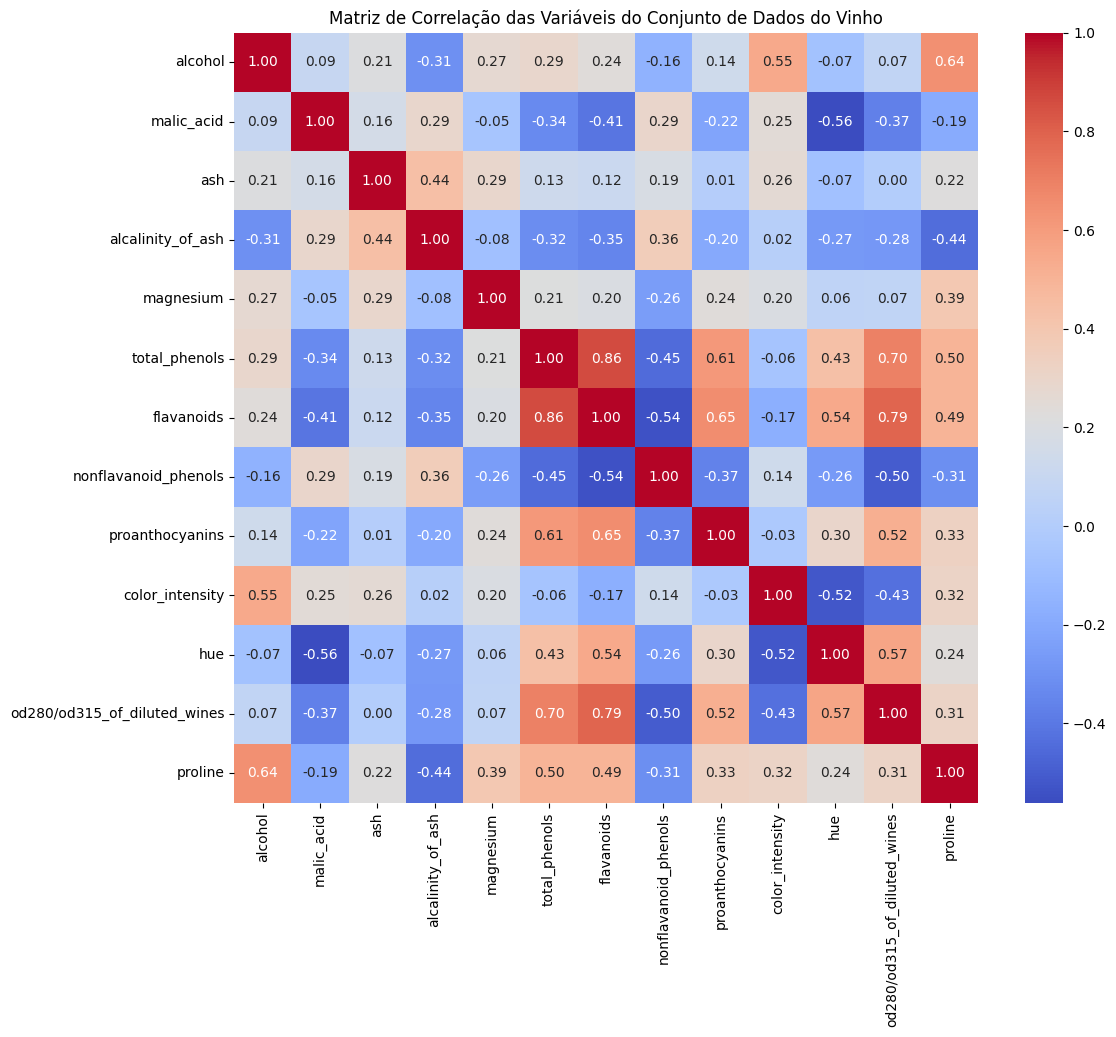

In [ ]:
plt.figure(figsize=(12, 10))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlação das Variáveis - Wine Dataset')
plt.show()